In [3]:
import re
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt


    
    

In [13]:
def initial():
    test_file = read_csv("dataset.csv")
    
    
    list_review = list()
    list_rating = list()
    Data_type = object
    
    for review in test_file['Review_Text']:
        review_stringlist = (normalization(review))
        
        list_review.append(review_stringlist)
        
    for rating in test_file["Rating"]:
        list_rating.append(rating)  

    vectorizer = CountVectorizer()
    vectorizer.fit(list_review)
    vocabulary = vectorizer.vocabulary_
          
    x = vectorizer.transform(list_review).toarray()
    
   
    
    y = list_rating
    
  #  x.reshape(1, -1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 5)
    
    y_pred_multi = naive_bayes(x_train, x_test, y_train, y_test)
    
    y_pred_log = logistic_regression(x_train, x_test, y_train, y_test)
    
    svm(x_train, x_test, y_train, y_test)
    
    #sns.boxplot(test_file["Rating"])


    #analysis(x,y,y_pred,test_file)
    
    count = 0
    for i in range(len(y_pred_multi)):
        if(y_pred_multi[i]==y_pred_log[i]):
            count+=1
    print("Similarity in multinomial and logistic regression results is: ",count/len(y_pred_multi))

In [5]:
def naive_bayes(x_train, x_test, y_train, y_test):
    
   
    #Gaussian NB
    
    model_gaus = GaussianNB()
    
    model_gaus.fit(x_train, y_train)

    
    output_gaus = model_gaus.predict(x_test)
    
    
    print(output_gaus)
    
    print(" Gaussian Accuracy:",accuracy_score(y_test, output_gaus))
     
    
    #Multinomial NB
    model_multi = MultinomialNB()
    
    model_multi.fit(x_train, y_train)

    
    output_multi = model_multi.predict(x_test)

    
    print(output_multi)
    
    print("Multinomial Accuracy:",accuracy_score(y_test, output_multi))


    df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':output_gaus})
    
    print()
    print()
    #for i in range(1,len(output_nb)+1):
     #   print(test_file['Review_Text'][-i]," ", output_nb[-i])
    print(df)
    
    return output_multi

    

In [6]:
def logistic_regression(X_train_counts, X_test_counts, y_train, y_test):
    
    #vectorizer = CountVectorizer()
    #X_train_counts = vectorizer.fit_transform(x_train)
    #X_test_counts = vectorizer.transform(x_test)
    
    logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
    logreg.fit(X_train_counts, y_train)
    
    y_pred = logreg.predict(X_test_counts)
    
    df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
    print( df)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Confusion matrix:", confusion_mat)
    
    labels = [1,2,3,4,5]
    
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #ax = sns.heatmap(ConfusionMatrix, annot=True, cmap=’BuPu’)
    
    return y_pred

In [7]:
def svm(x_train, x_test, y_train, y_test):
    print("in svm")
    svm = LinearSVC(max_iter = 10000)
    svm.fit(x_train, y_train)

    # Test the SVM
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    print(len(y_test),len(x_test),len(y_pred))
    #plt.scatter(range(len(y_test)), y_test,c=svm.decision_function(y_pred), cmap='viridis')
    #plt.colorbar()
    #plt.show()
    
    return y_pred



In [8]:
def normalization(inp):
    
    lower_case = inp.lower() #converting to lowercase
    #txt=lower_case.split()
   
    
    #removing the punctuation
    punctuation = re.sub(r'[^\w\s]','',lower_case) #removing all the punctuation except underscore
    punctuation2 = re.sub("_",'',punctuation) #removing underscore
    
    normalize_list = punctuation2#splitting the input into a list
    

    return normalize_list

[5 2 5 ... 2 5 4]
 Gaussian Accuracy: 0.230956060940605
[5 5 5 ... 5 4 5]
Multinomial Accuracy: 0.6345771693530581


      Real Values  Predicted Values
0               5                 5
1               4                 2
2               2                 5
3               4                 4
4               5                 5
...           ...               ...
4524            5                 2
4525            5                 5
4526            5                 2
4527            5                 5
4528            5                 4

[4529 rows x 2 columns]
      Real Values  Predicted Values
0               5                 5
1               4                 5
2               2                 5
3               4                 4
4               5                 5
...           ...               ...
4524            5                 5
4525            5                 5
4526            5                 5
4527            5                 5
4528            5             

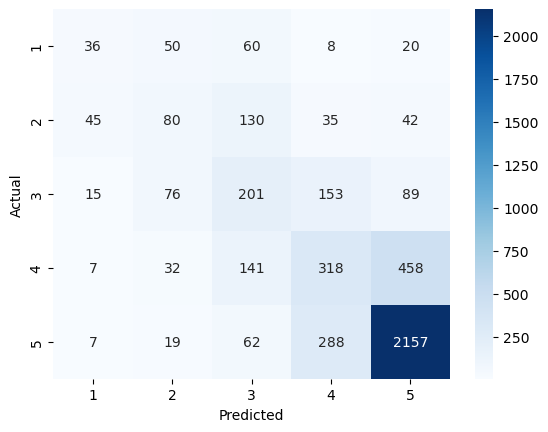

in svm
Accuracy: 0.5820269375138
4529 4529 4529
Similarity in multinomial and logistic regression results is:  0.7628615588430117


In [14]:
initial()